# **Importing necessary Libraries**

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# **Load the Dataset**

In [ ]:
# Load the dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalize the images to scale pixel values between 0 and 1
X_train, X_test = X_train / 255.0, X_test / 255.0

# Reshape data to add a channel dimension (grayscale has 1 channel)
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# **Model Buidling**

In [ ]:
def build_model():
    model = Sequential([
        Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(64, kernel_size=(3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(10, activation='softmax')
    ])

    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

model = build_model()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# **Training the Model**

In [ ]:
history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    epochs=10,
                    batch_size=128,
                    verbose=1)

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.7949 - loss: 0.6582 - val_accuracy: 0.9812 - val_loss: 0.0603
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9697 - loss: 0.1030 - val_accuracy: 0.9844 - val_loss: 0.0462
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9780 - loss: 0.0719 - val_accuracy: 0.9883 - val_loss: 0.0321
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9830 - loss: 0.0556 - val_accuracy: 0.9892 - val_loss: 0.0302
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9862 - loss: 0.0450 - val_accuracy: 0.9914 - val_loss: 0.0265
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9871 - loss: 0.0404 - val_accuracy: 0.9920 - val_loss: 0.0237
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9909 - loss: 0.0312 - val_accuracy: 0.9920 - val_loss: 0.0228
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9907 - loss: 0.0306 - val_accuracy: 0.

# **Model Evaluation**

In [ ]:
# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

Test Accuracy: 99.24%


# **Plot training & validation accuracy values**

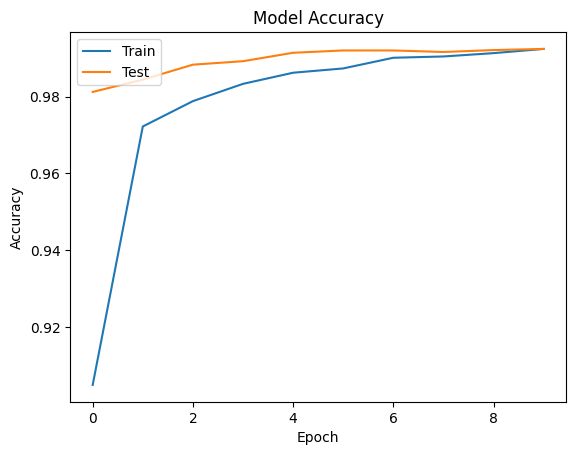

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


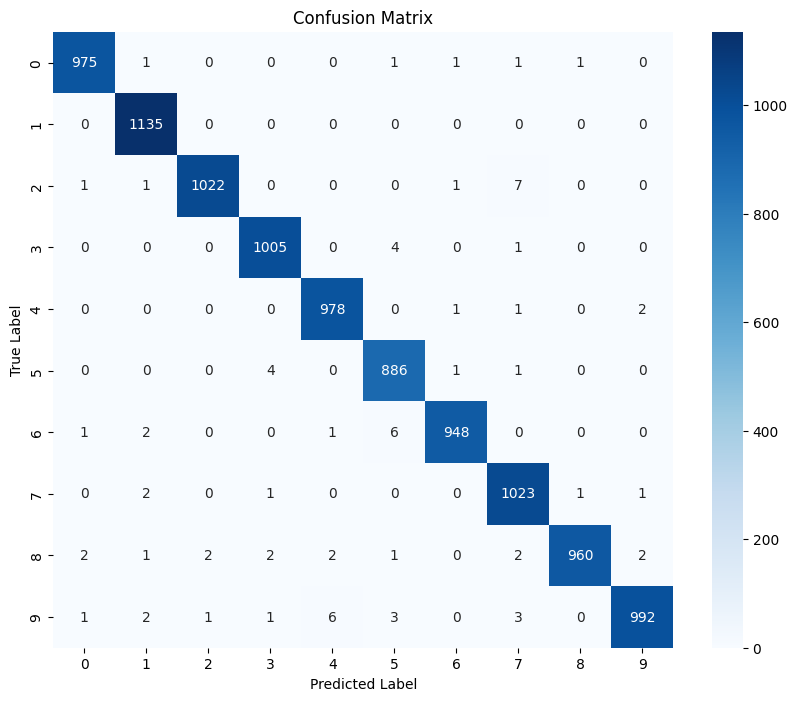

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      1.00      1135
           2       1.00      0.99      0.99      1032
           3       0.99      1.00      0.99      1010
           4       0.99      1.00      0.99       982
           5       0.98      0.99      0.99       892
           6       1.00      0.99      0.99       958
           7       0.98      1.00      0.99      1028
           8       1.00      0.99      0.99       974
           9       0.99      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [ ]:
# Predict classes for test data
y_pred = np.argmax(model.predict(X_test), axis=-1)
y_true = np.argmax(y_test, axis=-1)

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Classification report
print(classification_report(y_true, y_pred))


In [ ]:
model.save("digit_recognition_model.h5")

# **Test with a sample image from dataset**

In [ ]:
# Load the model
from tensorflow.keras.models import load_model
model = load_model("digit_recognition_model.h5")

# Test with a sample image
sample_image = X_test[0].reshape(1, 28, 28, 1)  # reshape to fit model input
prediction = model.predict(sample_image)
print("Predicted digit:", np.argmax(prediction))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 356ms/step
Predicted digit: 7


# **To test with other Images**

In [ ]:
!pip install --upgrade Pillow # Upgrade Pillow to the latest version
from PIL import Image, ImageOps
import cv2
import numpy as np

# **Image Preprocessing**

In [ ]:
import numpy as np
from PIL import Image, ImageOps
#Pillow 10.0.0 changed the location
try:
    from PIL import ImageResampling
except ImportError:
    from PIL import Image as ImageResampling
import cv2

def preprocess_image(image_path):
    # Load the image in grayscale
    img = Image.open(image_path).convert("L")

    # Resize to 28x28 while maintaining aspect ratio
    img.thumbnail((28, 28), ImageResampling.LANCZOS) # Use ImageResampling.LANCZOS

    # Create a white canvas (28x28) and paste the resized image on it
    canvas = Image.new("L", (28, 28), 255)  # White canvas
    img_centered = ImageOps.invert(img)  # Invert for white digit on black background
    canvas.paste(img_centered, ((28 - img_centered.width) // 2, (28 - img_centered.height) // 2))

    # Convert to numpy array and normalize pixel values
    img_array = np.array(canvas) / 255.0
    img_array = img_array.reshape(1, 28, 28, 1)  # Reshape for model input

    return img_array

# **Test Prediction**

In [ ]:
# Path to your image
image_path = "/content/images (1).jpg"  # Replace with your actual image path

# Preprocess and predict
processed_image = preprocess_image(image_path)
prediction = model.predict(processed_image)
predicted_digit = np.argmax(prediction)

print("Predicted digit:", predicted_digit)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Predicted digit: 1


# **Visualize the Processed Image**

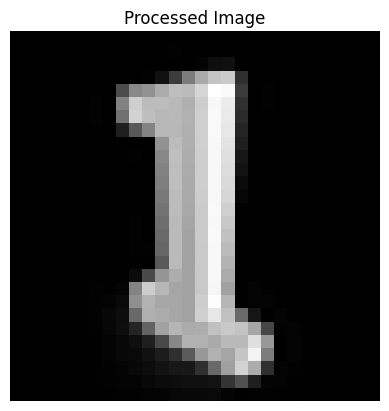

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(processed_image[0, :, :, 0], cmap="gray")
plt.title("Processed Image")
plt.axis("off")
plt.show()
